# Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Example revisited

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [74]:
import pandas as pd
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

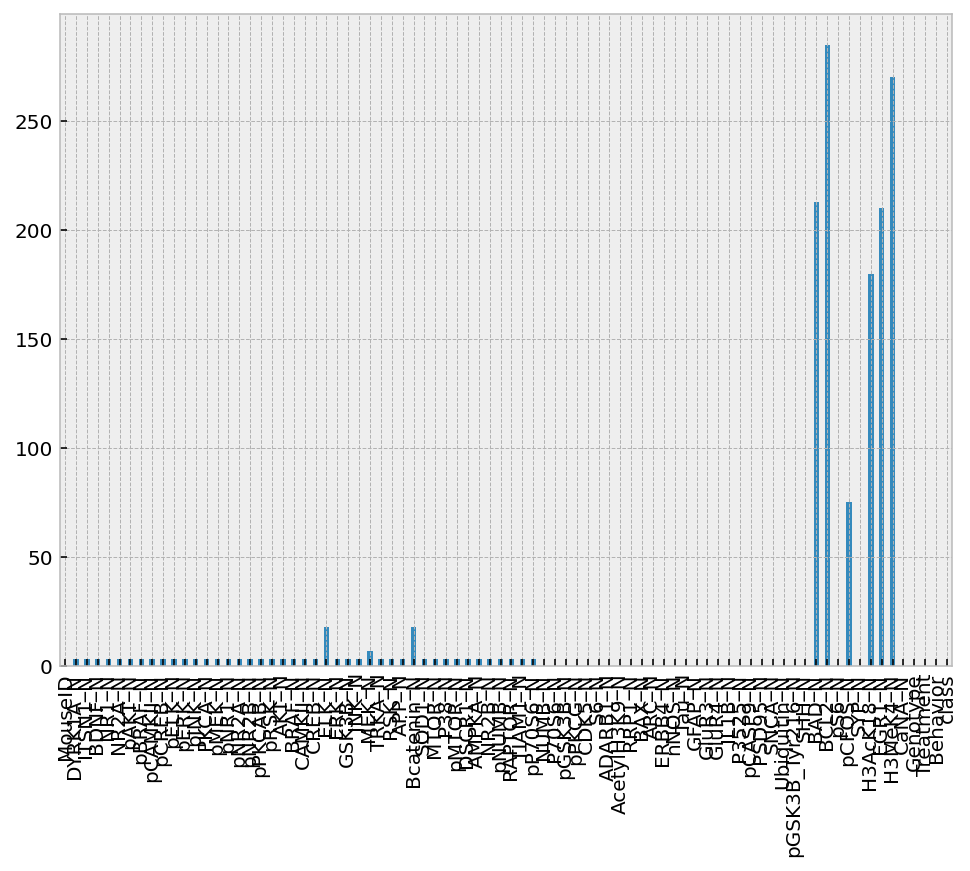

In [75]:
df.isnull().sum().plot.bar();

In [76]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [77]:
miss_too_many.sum()

8

In [78]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [79]:
# discard mice with missing measurements
df2 = df2.dropna()

df2.shape

(1073, 74)

The dataset we will use for building a classsification model.

In [80]:
df2

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Can you predict genotype based on protein expression?

What about treatment, behavior or class?

In [81]:
expr = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
genotype = df2['Genotype']
treatment = df2['Treatment']
behavior = df2['Behavior']
mouse_class = df2['class']

expr.shape, genotype.shape

((1073, 69), (1073,))

In [82]:
mouse_class.unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

Genotype vs. cortical protein expression profile.

In [83]:
pd.DataFrame(genotype).join(expr)

,Genotype,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
0,Control,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
1,Control,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
2,Control,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
3,Control,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
4,Control,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,Ts65Dn,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.326362,1.323554,2.578046,0.167181,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823
1076,Ts65Dn,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.344160,1.275605,2.534347,0.169592,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478
1077,Ts65Dn,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.358114,1.437534,2.544515,0.179692,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825
1078,Ts65Dn,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.352279,1.498820,2.609769,0.185037,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031


The problem with linear regression.

$\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n$

But $y$ (*Genotype*) will be a continuous variable, whereas it needs to be one of two things: *Control* or *Ts65Dn*.

We could still try to use linear regression and just impose a threshold to do the classification.

![](images/linear-regression-threshold.jpeg)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

But what if we have an outlier in the data?

Non-ideal data could easily lead to misclassification using a linear model.

![](images/linear-regression-threshold-outlier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

A sigmoidal function will better classify categorical data and will be less prone to error due to outliers.

![](images/logistic-regression-classifier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

### Logistic regression

$\hat{y} = sigmoid \left( \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n \right)$

$y = Bernoilli(\hat{y}) = 
\left\{ \begin{matrix}
0 & Control \\
1 & Ts65Dn \\
\end{matrix} \right\}$

How well can you predict genotype based on protein expression using logistic regression?

In [84]:
X = expr.to_numpy()
y = genotype.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['Control', 'Ts65Dn'], dtype=object))

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# train model on training set
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# evaluate accuracy on testing set
y_test_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.9023255813953488

In [86]:
results = pd.DataFrame(y_test, columns=['true'])
results["prediction"] = y_test_pred
results

,true,prediction
0,Ts65Dn,Control
1,Control,Control
2,Control,Control
3,Ts65Dn,Ts65Dn
4,Control,Control
...,...,...
425,Control,Ts65Dn
426,Control,Control
427,Ts65Dn,Ts65Dn
428,Control,Control


### Confusion matrix

In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm

array([[205,  18],
       [ 24, 183]])

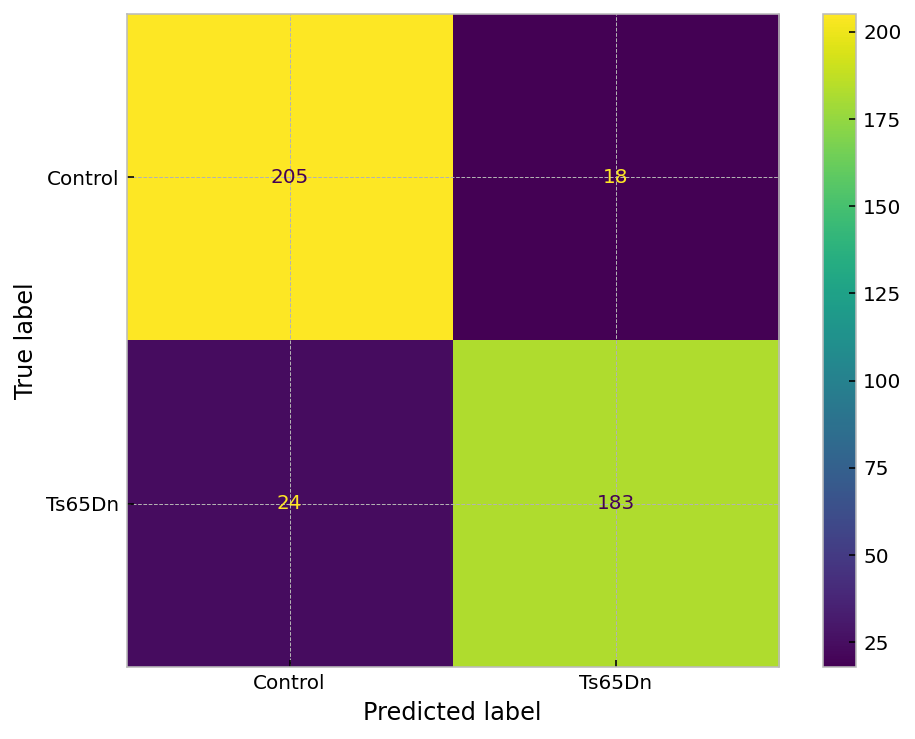

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot();

### $precision = \frac{TP}{TP + FP} = \frac{\text{correct P predictions}}{\text{all P predictions}}$

precision is fraction of P predictions that are correct

### $recall = \frac{TP}{TP + FN} = \frac{\text{correct P predictions}}{\text{all true P}}$

recall is fraction of true P correctly predicted

### $F1 = 2\ \frac{precision\ \times\ recall}{precision\ +\ recall}$

F1 score is the harmonic mean of the precision and recall

$\textrm{worst}\; 0 \le F1 \le 1 \;\textrm{best}$

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

     Control       0.90      0.92      0.91       223
      Ts65Dn       0.91      0.88      0.90       207

    accuracy                           0.90       430
   macro avg       0.90      0.90      0.90       430
weighted avg       0.90      0.90      0.90       430



From logistic regression model you can determine not only the predicted genotypes, but the predicted probability of each genotype.

In [90]:
y_test_proba = model.predict_proba(X_test)
y_test_proba.shape

(430, 2)

In [91]:
model.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [92]:
results['pred. prob. Control'] = y_test_proba[:,0]
results['pred. prob. Ts65Dn'] = y_test_proba[:,1]
results

,true,prediction,pred. prob. Control,pred. prob. Ts65Dn
0,Ts65Dn,Control,0.882878,0.117122
1,Control,Control,0.792183,0.207817
2,Control,Control,0.508828,0.491172
3,Ts65Dn,Ts65Dn,0.330259,0.669741
4,Control,Control,0.776538,0.223462
...,...,...,...,...
425,Control,Ts65Dn,0.443366,0.556634
426,Control,Control,0.802129,0.197871
427,Ts65Dn,Ts65Dn,0.428431,0.571569
428,Control,Control,0.565706,0.434294


### Reciever Operating Charachteristic (ROC) curve

![](images/roc.png)

Image from Wikipedia

### $\text{true positive rate} = \frac{TP}{P} = \frac{TP}{TP + FN}$

### $\text{false positive rate} = \frac{FP}{N} = \frac{FP}{FP + TN}$

The ROC curve represents the changing true and false positive rates as you change your binary classification threshold.

![](images/roc-thresholds.png)

Image from https://towardsdatascience.com/understanding-the-roc-curve-in-three-visual-steps-795b1399481c

Where you place the binary classification threshold (e.g., 0.5) will define your true positive and false positive rates.

![](images/logistic-regression-classifier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

In [93]:
from sklearn.metrics import roc_curve

# ROC curve for the probability of classifying the genotype of each mouse as Ts65Dn
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label=model.classes_[1])

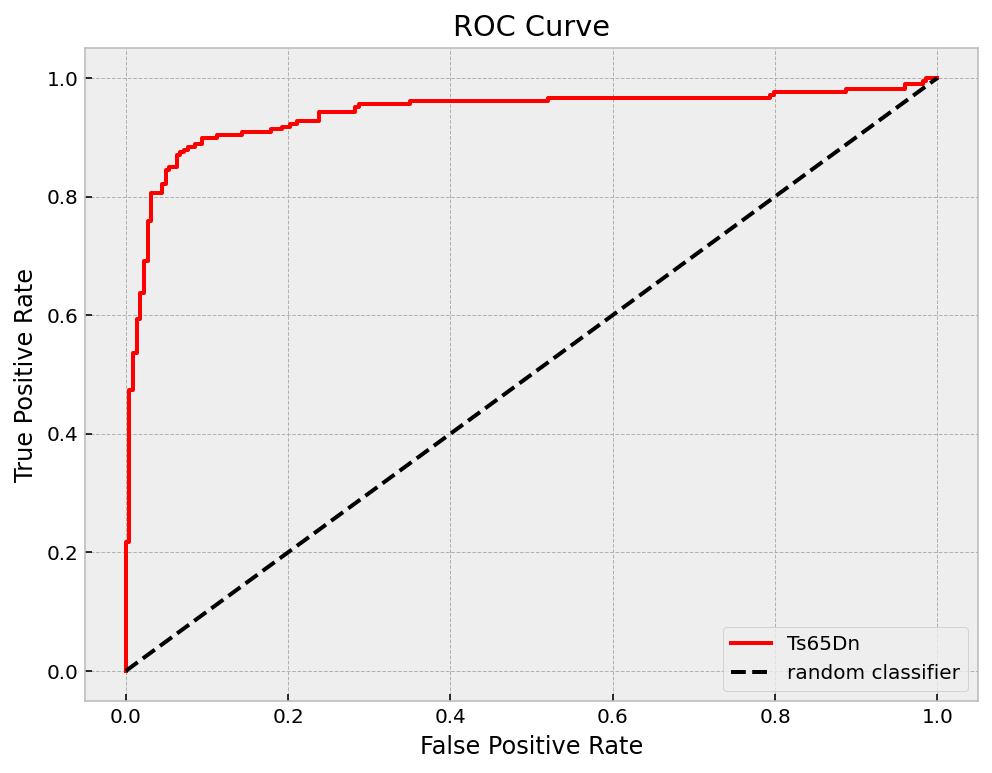

In [94]:
# P(Ts65Dn) ROC curve
plt.plot(fpr, tpr, color='r', label=model.classes_[1])
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

In [95]:
# evaluate the model based on the area under the curve (auc)
from sklearn.metrics import auc

auc(fpr, tpr)

0.9389744589588614

Ok, but all of the above was only for one particular way of splitting the data in train/test sets. How much can we expect this to extrapolate to other ways of splitting the data or new data entirely?

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=300)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

cv_y_pred = y.copy()
cv_y_proba = np.zeros([len(y), 2])

for i, (train_ind, test_ind) in enumerate(kf.split(X, y)):
    X_train, y_train, X_test, y_test = X[train_ind], y[train_ind], X[test_ind], y[test_ind]
    model.fit(X_train, y_train)
    
    cv_y_pred[test_ind] = model.predict(X_test)
    cv_y_proba[test_ind] = model.predict_proba(X_test)

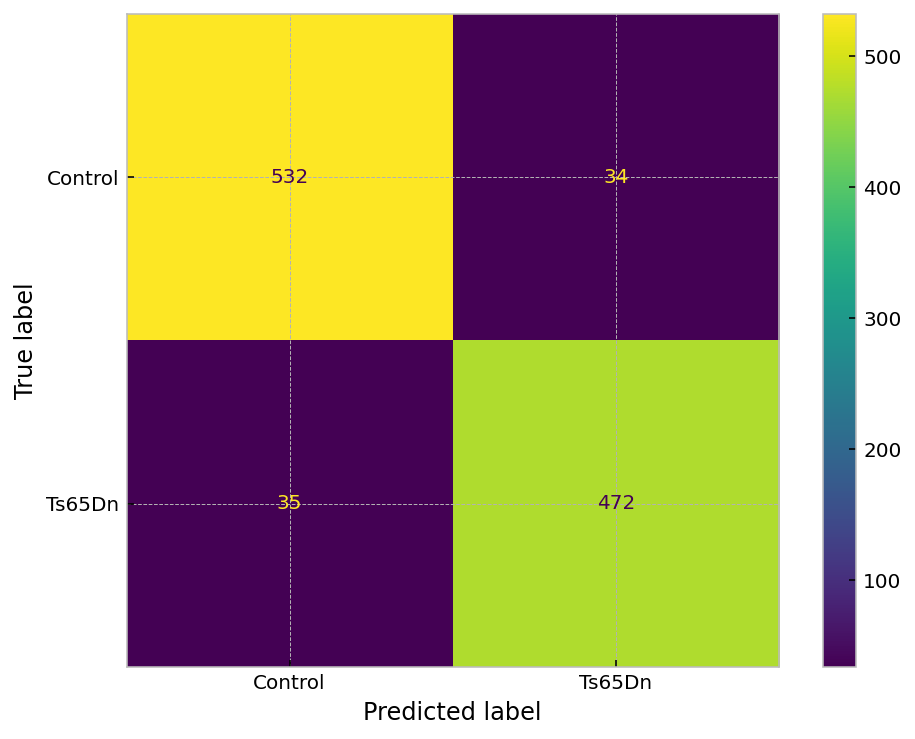

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y, cv_y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot();

0.9684766624152327

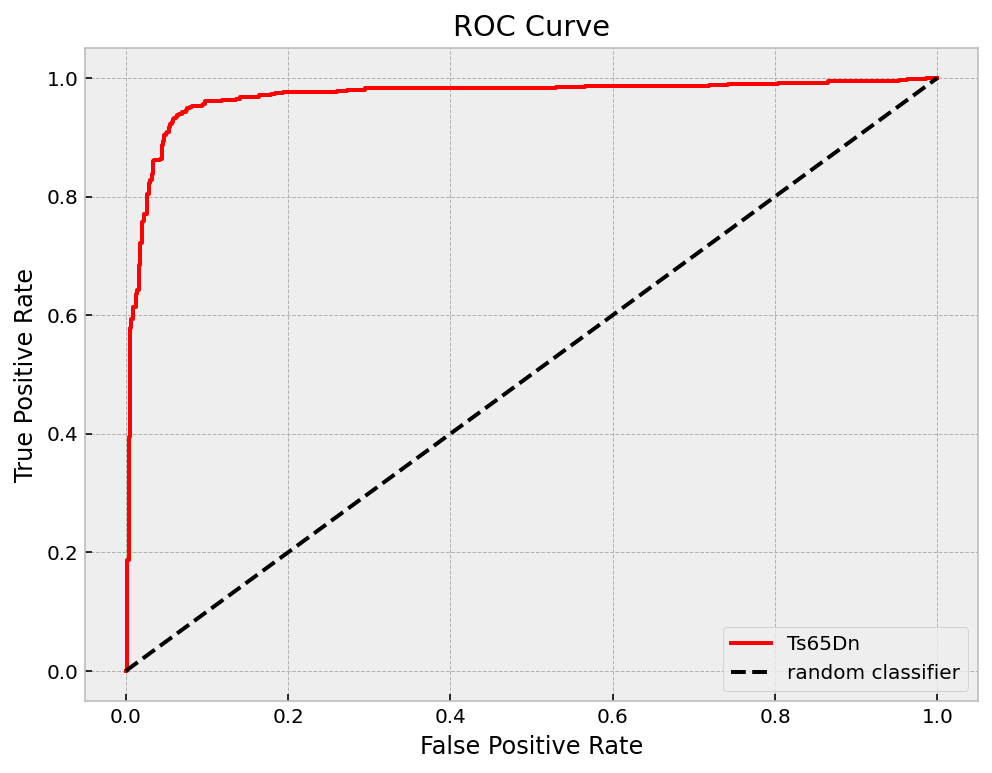

In [98]:
from sklearn.metrics import roc_curve, auc

# ROC curve for the probability of classifying the genotype of each mouse as Ts65Dn
fpr, tpr, thresholds = roc_curve(y, cv_y_proba[:,1], pos_label=model.classes_[1])

# P(Ts65Dn) ROC curve
plt.plot(fpr, tpr, color='r', label=model.classes_[1])
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

# evaluate the model based on the area under the curve (auc)
auc(fpr, tpr)

# Exercise

1. Use logistic regression to predict behavior (C/S vs. S/C) based on protein expression.

    C/S: stimulated to learn
    S/C: not stimulated to learn

2. Generate a confusion matrix and ROC curve to visualize the performance of your classifier.
3. Plot an ROC curve for classification of mice that underwent C/S behavioral training.

In [166]:
X = expr.to_numpy()
y = behavior.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['C/S', 'S/C'], dtype=object))

In [46]:
# construct a logistic regression model object
...

# use StratifiedKFold to define how to split training/validation sets
# during cross validation
...

# create an array to store the predicted behavioral training method for each mouse
...

# create an array to store the predicted probabilities 
# of each behavioral training method for each mouse
...

# perform cross validation and store the predicted behavioral training methods 
# and the probabilities for each training method 
# for each validation set in the arrays you allocated above
...

In [ ]:
# create and display a confusion matrix for the 
# predicted vs. true behavioral training method of each mouse
...

In [ ]:
# create and display a ROC curve for classification of mice
# that underwent C/S behavioral training (i.e., y = 'C/S')
...

### Multinomial logistic regression

Can you predict which of the eight classes a mouse belongs to based on protein expression?

In [99]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

In [100]:
# for now we'll just fit all of the data
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

model.coef_.shape

(8, 69)

Each of the 8 sets of coefficients defines a logistic regression model for the binary classification of YES vs. NO for one of the 8 possible classes.

So really, we just fit 8 separate logistic regression models to 8 possible ways of splitting up the response output into binary classifications.

The final predicted class for a mouse is the class with the highest probability across the 8 models.

In [101]:
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      c-CS-m       0.92      0.89      0.90       150
      c-CS-s       0.84      0.82      0.83       131
      c-SC-m       0.93      1.00      0.96       150
      c-SC-s       0.99      0.96      0.97       135
      t-CS-m       0.88      0.90      0.89       135
      t-CS-s       0.95      0.97      0.96       105
      t-SC-m       1.00      0.90      0.95       135
      t-SC-s       0.94      1.00      0.97       132

    accuracy                           0.93      1073
   macro avg       0.93      0.93      0.93      1073
weighted avg       0.93      0.93      0.93      1073



In [102]:
y_proba = model.predict_proba(X)

result = pd.DataFrame(y_proba, columns=model.classes_)
result['Prediction'] = y_pred
result

,c-CS-m,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s,Prediction
0,0.465339,0.519401,7.018928e-09,0.002593,0.010683,0.001962,0.000007,0.000014,c-CS-s
1,0.588090,0.388768,1.965163e-08,0.003555,0.018186,0.001364,0.000009,0.000029,c-CS-m
2,0.523038,0.444868,1.553848e-08,0.002202,0.027742,0.002116,0.000005,0.000030,c-CS-m
3,0.379084,0.576274,1.011237e-07,0.004192,0.036851,0.003535,0.000006,0.000059,c-CS-s
4,0.373862,0.545522,1.855821e-07,0.004768,0.071103,0.004648,0.000006,0.000091,c-CS-s
...,...,...,...,...,...,...,...,...,...
1068,0.005568,0.000467,2.045881e-03,0.066767,0.015532,0.054704,0.003153,0.851762,t-SC-s
1069,0.011492,0.000883,1.409209e-03,0.135090,0.020270,0.042937,0.003401,0.784518,t-SC-s
1070,0.017291,0.001030,4.286289e-03,0.120126,0.044403,0.134339,0.002837,0.675688,t-SC-s
1071,0.015043,0.000600,2.795017e-03,0.103457,0.025352,0.076127,0.003749,0.772877,t-SC-s


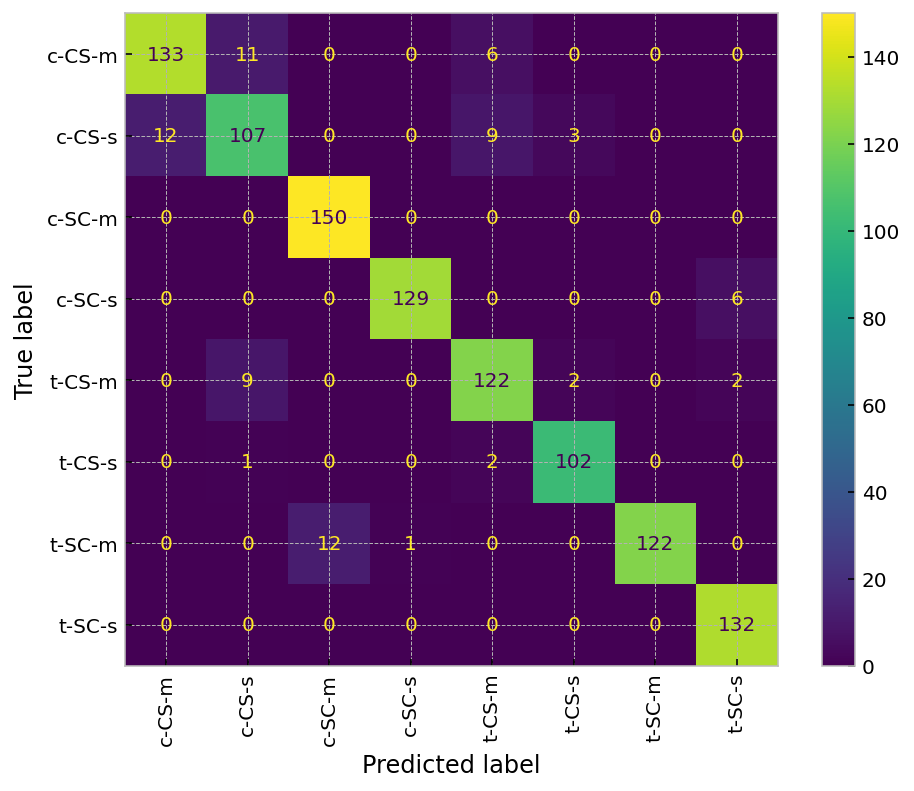

In [103]:
cm = confusion_matrix(y, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot(xticks_rotation='vertical');

A ROC curve is for a binary decision.

To show ROC curves for multiple classes, we consider for each class the binary classification of that class vs. all other classes.

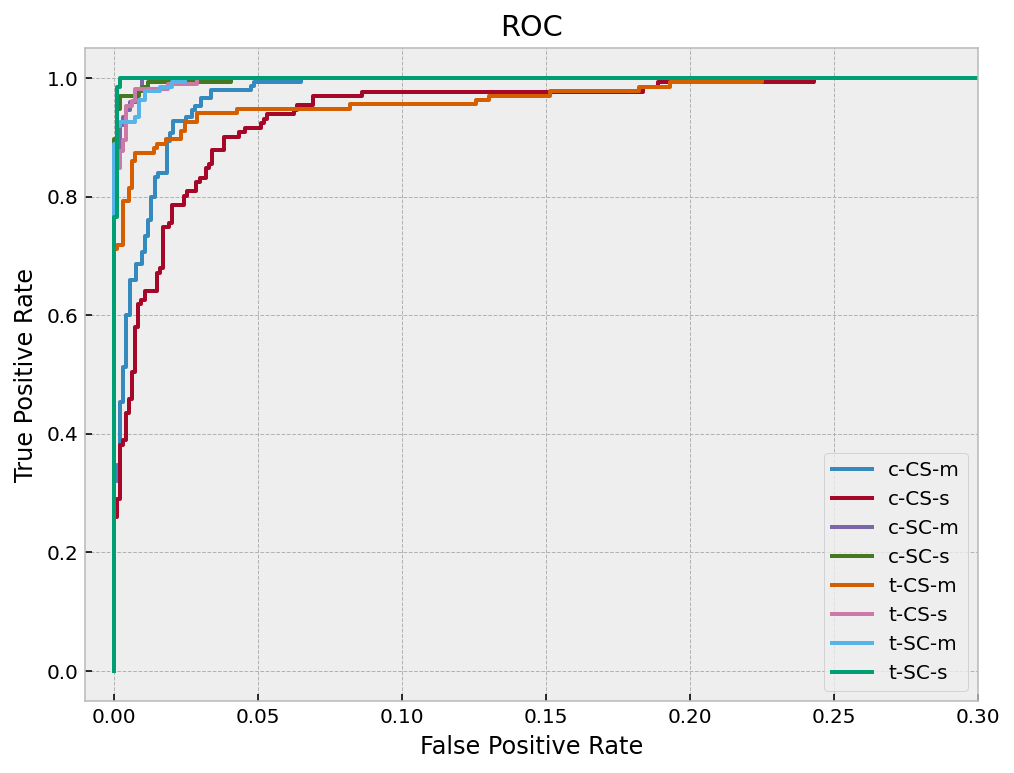

In [104]:
for i, label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y == label, y_proba[:,i])
    plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.xlim([-0.01, 0.3])
plt.legend();

# Exercise

For a logistic regression classifier of mouse class (one of the 8 classes in the above dataset) based on its cortical nuclear protein expression level profile, use 10-fold cross validation to estimate a confusion matrix that shows the predicted accuracy of the model on mice in the future.

In [52]:
X = expr.to_numpy()
y = class_.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

In [ ]:
# construct a logistic regression model object
...

# use StratifiedKFold to define how to split training/validation sets
# during cross validation
...

# create an array to store the predicted class for each mouse
...

# create an array to store the predicted probabilities of each class for each mouse
...

# perform cross validation and store the predicted classes and probabilities
# for each class for each validation set in the arrays you allocated above
...

In [ ]:
# create and display a confusion matrix for the predicted vs. true class of each mouse
...

# Exercise

Write a function that takes as input a classification model, cross validation partitioning object and data X and y, and displays a confusion matrix based on the true vs. predicted classes across validation sets.

Use the function to recreate the confusion matrix for the logistic regression classification of mouse classes based on protein expression profiles above.

In [ ]:
def show_confusion_matrix(classification_model, cross_validation_splitter, X, y):
    ...

# Support Vector Machine (SVM) classifier

A decision boundary used for binary classification.

![](images/svm-vline.webp)

Optimal boundary maximizes the distance between each class (margin).

![](images/svm-dline.webp)

![](images/svm-margin-support-vectors.png)

Multinomial classification with SVM.

![](images/svm-2vs3-classes.png)

Use an SVM classifier to predict mouse class based on protein expression in cortex.

In [106]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

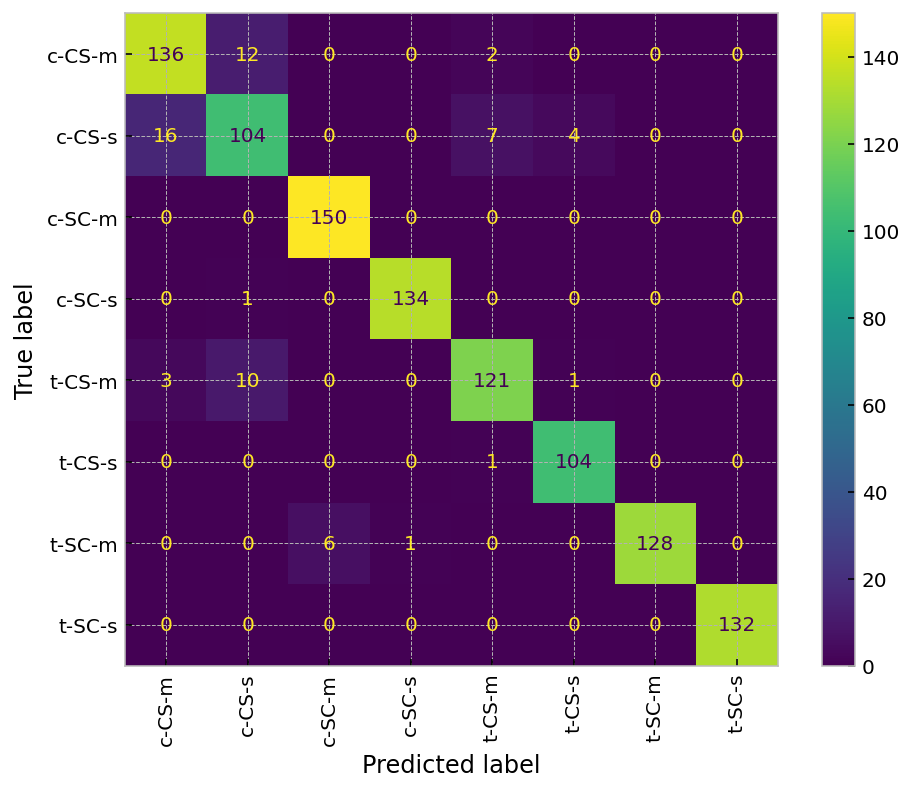

In [115]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1, probability=True)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

show_confusion_matrix(model, kf, X, y)

**Soft margin** allows for misclassifications in the training set. The penalty for missclassifications is scaled by a hyperparameter `C` which sets a compromise between missclassifications and maximizing the margin.

* **left**: Larger penalty for missclassifications
* **right**: Smaller penalty for missclassifications.

![](images/svm-largeC-vs-smallC.png)

# Exercise

Determine the optimal value of the penalty `C` for predicting a mouse's class based on its cortical protein expression profile. 

In [145]:
from sklearn.model_selection import GridSearchCV

# SVM linear classifier
model = ...

# try these values for the penalty C
param_grid = {'C': np.logspace(-1, 2, 30)}

# stratified 10-fold splitter
kf = ...

# grid search cross validation to find best C
svm_search = ...
...

svm_C = svm_search.best_params_['C']
svm_C

23.95026619987486

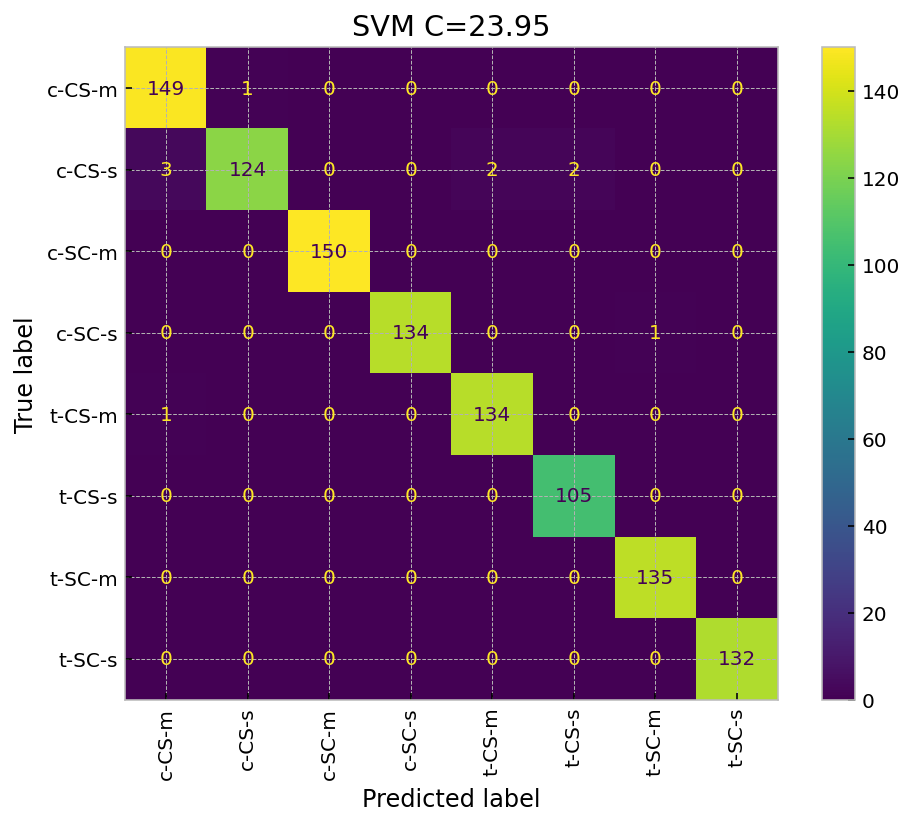

In [152]:
model = SVC(kernel='linear', C=svm_C, probability=True)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

show_confusion_matrix(model, kf, X, y)
plt.title(f'SVM C={svm_C :.2f}');

Compare SVM and logistic regression classifiers.

In [149]:
from sklearn.model_selection import RandomizedSearchCV

# WARNING!!! This is VERY SLOW!
model = LogisticRegression(max_iter=5000)

param_grid = {'C': np.logspace(2, 4, 20)}
logreg_search = RandomizedSearchCV(model, param_grid, cv=10, scoring='accuracy')
logreg_search.fit(Xs, ys)

logreg_C = logreg_search.best_params_['C']
logreg_C

695.1927961775606

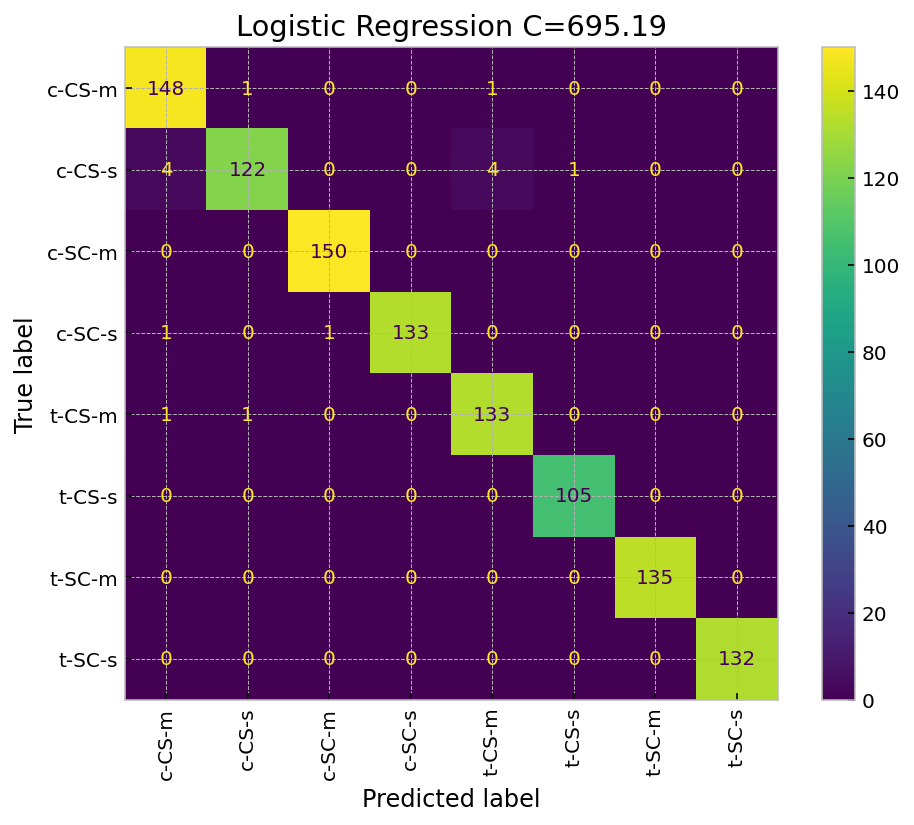

In [153]:
model = LogisticRegression(C=logreg_C, max_iter=5000)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

show_confusion_matrix(model, kf, X, y)
plt.title(f'Logistic Regression C={logreg_C:.2f}');

In [154]:
svm_search.cv_results_['mean_fit_time']

array([0.03191569, 0.02779572, 0.02756777, 0.02587886, 0.02507989,
       0.02445722, 0.02350338, 0.02241538, 0.02182875, 0.02218876,
       0.02405303, 0.02169149, 0.0215533 , 0.02131217, 0.02693546,
       0.02385693, 0.02254529, 0.02379441, 0.02454331, 0.02460368,
       0.02530131, 0.02725544, 0.03028204, 0.03161578, 0.03167834,
       0.03149846, 0.03134055, 0.03212471, 0.03219082, 0.03187039])

In [155]:
svm_total_search_time_sec = svm_search.cv_results_['mean_fit_time'].sum() * 10
logreg_total_search_time_sec = logreg_search.cv_results_['mean_fit_time'].sum() * 10

svm_total_search_time_sec, logreg_total_search_time_sec

(7.926783084869385, 193.6416943073273)

SVM can incorporate nonlinear decision boundaries. In `sklearn.svm.SVC` this is set via the `kernel` parameter.

![](images/svm-linear-vs-nonlinear.png)

Radial Basis Function (RBF) kernel ~ Gaussian kernel

In [160]:
model = SVC(kernel='rbf')

param_grid = {'C': np.logspace(-1, 2, 30)}
gs = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
gs.fit(Xs, ys)

C = gs.best_params_['C']
C

78.80462815669912

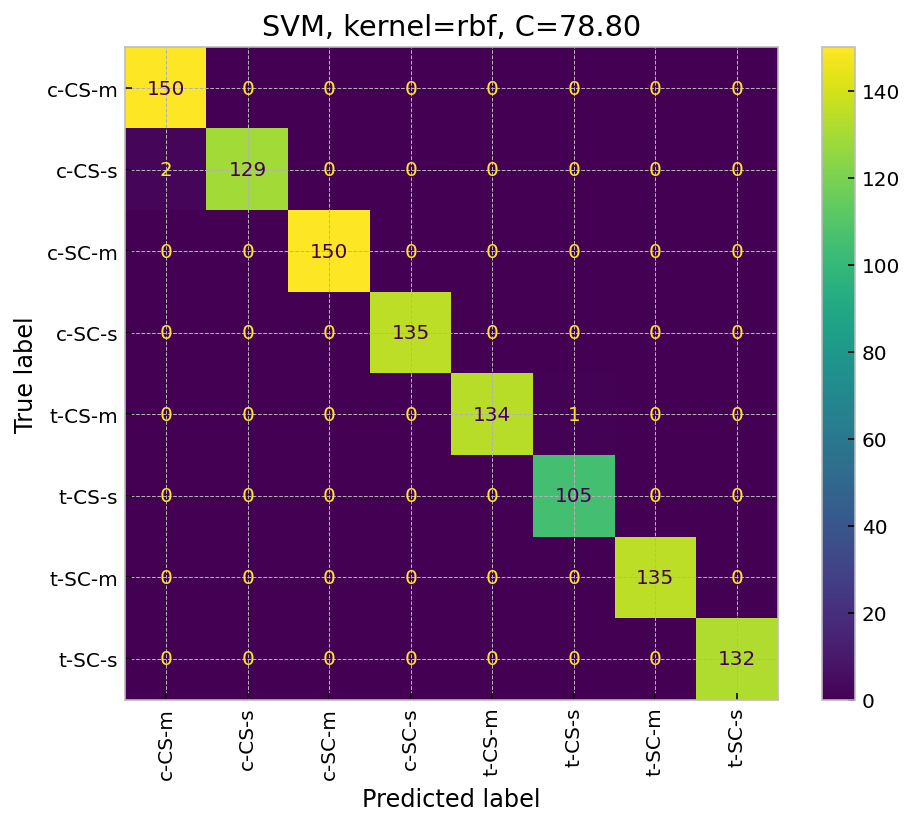

In [161]:
model = SVC(kernel='rbf', C=C, probability=True)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

show_confusion_matrix(model, kf, X, y)
plt.title(f'SVM, kernel=rbf, C={C :.2f}');